In [128]:
import pandas as pd
import numpy as np

In [129]:
Zoo=pd.read_csv(r"C:\data\data science\Study material\KNN\Datasets_KNN\Zoo.csv")

In [130]:
Zoo.info()
Zoo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [131]:
Zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [132]:
d1=Zoo.duplicated()
d1.sum()

0

In [133]:
#normalization function
def nor_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [136]:
#normalizing the given data set
Zoo_n=nor_func(Zoo.iloc[:, 1:17])

In [137]:
Zoo_n.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.355198,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.254173,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
x = np.array(Zoo_n.iloc[:,:])

y = np.array(Zoo['type'])

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn=KNeighborsClassifier(n_neighbors=25)

In [151]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [152]:
pred=knn.predict(x_test)
pred

array([2, 1, 1, 1, 7, 4, 1, 2, 2, 2, 1, 2, 1, 1, 7, 4, 4, 7, 1, 4, 2],
      dtype=int64)

In [153]:
#evaluate the model
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,pred))
pd.crosstab(y_test,pred,rownames=['actual'],colnames=['predections'])

0.8571428571428571


predections,1,2,4,7
actual,,,,
1,8,0,0,0
2,0,5,0,0
4,0,0,4,0
5,0,0,0,2
6,0,1,0,0
7,0,0,0,1


In [154]:
#error on train data
pred_train = knn.predict(x_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['actual'], colnames = ['predictions']) 

0.825


predictions,1,2,4,7
actual,,,,
1,33,0,0,0
2,0,15,0,0
3,1,1,3,0
4,0,0,9,0
5,0,0,2,0
6,0,2,0,5
7,0,0,0,9


In [155]:
#creating empty list variable
acc=[]

In [156]:
#running KNN algorithm for 3 to 50 nearest neighbours (odd numbers)
# and storing the accuracy values

In [157]:
for i in range (3,50,2):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    train_acc=np.mean(neigh.predict(x_train)==y_train)
    test_acc=np.mean(neigh.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

In [158]:
import matplotlib.pyplot as plt

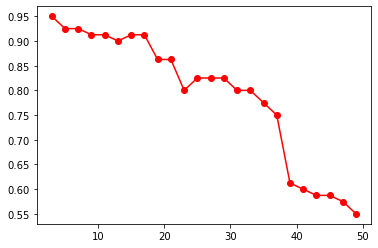

In [159]:
#train accaccuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

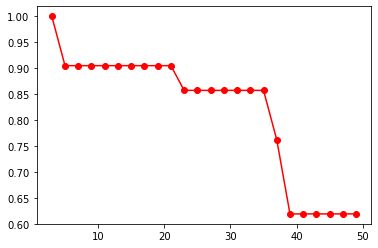

In [160]:
#test accaccuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")